In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.path.abspath('~/deep/deep-learning-from-scratch/'))
sys.path.append(os.path.abspath('src/'))
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from simpleconvnet import SimpleConvNet
from trainer import Trainer
from collections import OrderedDict
from LoadDogs import create_training_data



In [2]:
(x_train, t_train), (x_test, t_test) = create_training_data()

In [3]:
x_train.shape

(1997, 80, 80, 3)

In [4]:
max_epochs = 3

network = SimpleConvNet(input_dim=(3,80,80), 
                        conv_param = {'filter_num': 100, 'filter_size': 11, 'pad': 0, 'stride': 1},
                        hidden_size=50, output_size=2, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=32,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=100)


test_acc = []

for i in range(trainer.max_iter):
    trainer.train_step()

    test_acc.append(trainer.network.accuracy(trainer.x_test, trainer.t_test))

In [5]:
trainer.iter_per_epoch

63

In [6]:
trainer.train()

iter: 1 / 189
train loss:7.555357283261714
iter: 2 / 189
train loss:8.562716178310453
iter: 3 / 189
train loss:1.232980786118866
iter: 4 / 189
train loss:6.974363255689614
iter: 5 / 189
train loss:1.2883764723914366
iter: 6 / 189
train loss:0.9424550671677125
iter: 7 / 189
train loss:1.0184821163046585
iter: 8 / 189
train loss:0.7538042134864371
iter: 9 / 189
train loss:0.7353918672564226
iter: 10 / 189
train loss:0.8170324584599972
iter: 11 / 189
train loss:0.6551331957387196
iter: 12 / 189
train loss:0.697303164551627
iter: 13 / 189
train loss:0.6833728534717864
iter: 14 / 189
train loss:0.6913877076097867
iter: 15 / 189
train loss:0.7059094847838803
iter: 16 / 189
train loss:0.7004457871509818
iter: 17 / 189
train loss:0.6857637406754032
iter: 18 / 189
train loss:0.6899988927698506
iter: 19 / 189
train loss:0.6858584426152157
iter: 20 / 189
train loss:0.6851818844370611
iter: 21 / 189
train loss:0.6708407076799994
iter: 22 / 189
train loss:0.6594137877582675
iter: 23 / 189
train los

Saved Network Parameters!


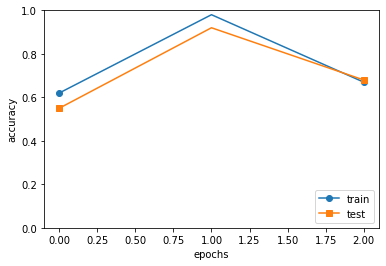

In [7]:
network.save_params("params.pkl")
print("Saved Network Parameters!")


markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [8]:
x

array([0, 1, 2])

In [9]:
trainer.train_acc_list

[0.62, 0.98, 0.67]